## _Training_
### Preparing the main model training it on the default environment with the goal in the bottom right

In [10]:
%reload_ext autoreload
from env.frozen_lake import FrozenLakeEnv
from stable_baselines3 import DQN
from constants import RENDER_MODE, BOTTOM_RIGHT, FPS
import os

os.makedirs("./models", exist_ok=True)

print("training bottom right env...")
bottom_right_env = FrozenLakeEnv(RENDER_MODE, desc=BOTTOM_RIGHT, fps=FPS)
model = DQN(policy="MlpPolicy", env=bottom_right_env)
model = model.learn(1e6, progress_bar=True)
model.save("./models/bottom_right")
print("saved bottom right model.")


training bottom right env...


## _Evaluation_
### Conduct evals on each model and save data

loaded top right model.
loaded bottom right model.
loaded bottom right model.
evaluating top right env...
eval_ep: 200/200 | current_reward: 1.0 | total_rewards: 179.0
finished evaluating 200 eps. total_rewards: 179.0
evaluating bottom left env...
eval_ep: 200/200 | current_reward: 0.0 | total_rewards: 18.0
finished evaluating 200 eps. total_rewards: 18.0
evaluating bottom right env...
eval_ep: 200/200 | current_reward: 1.0 | total_rewards: 116.0
finished evaluating 200 eps. total_rewards: 116.0


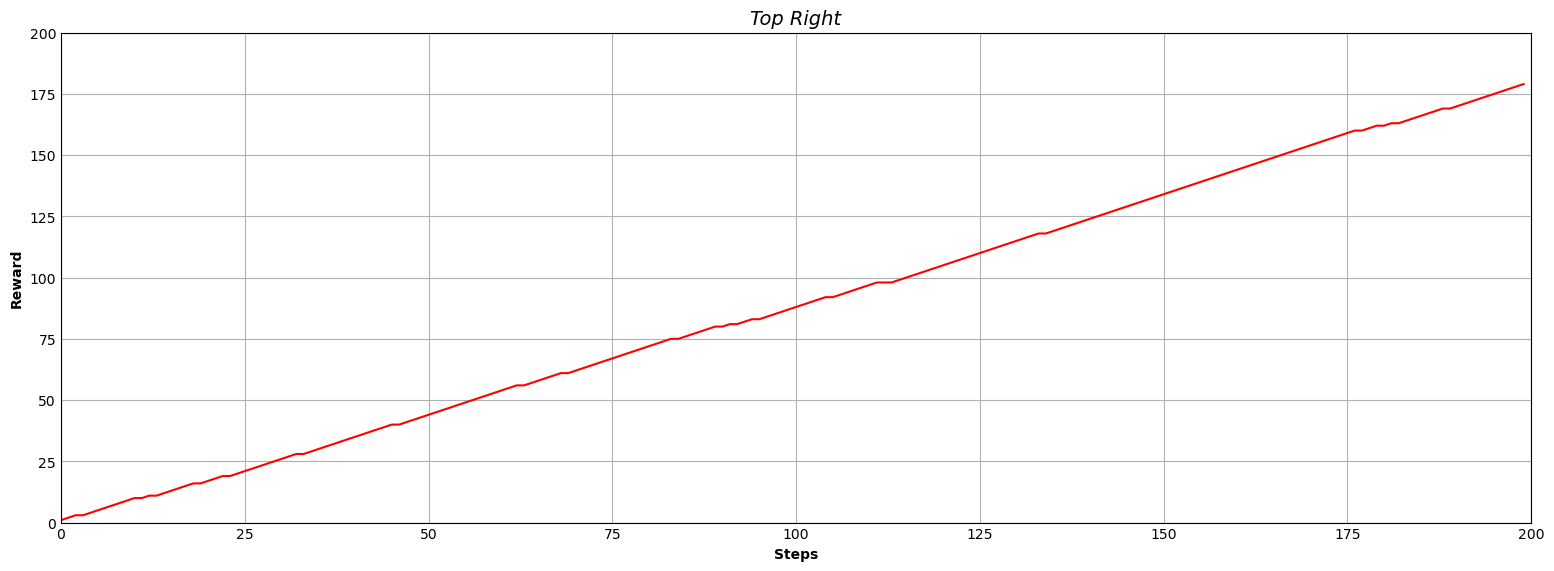

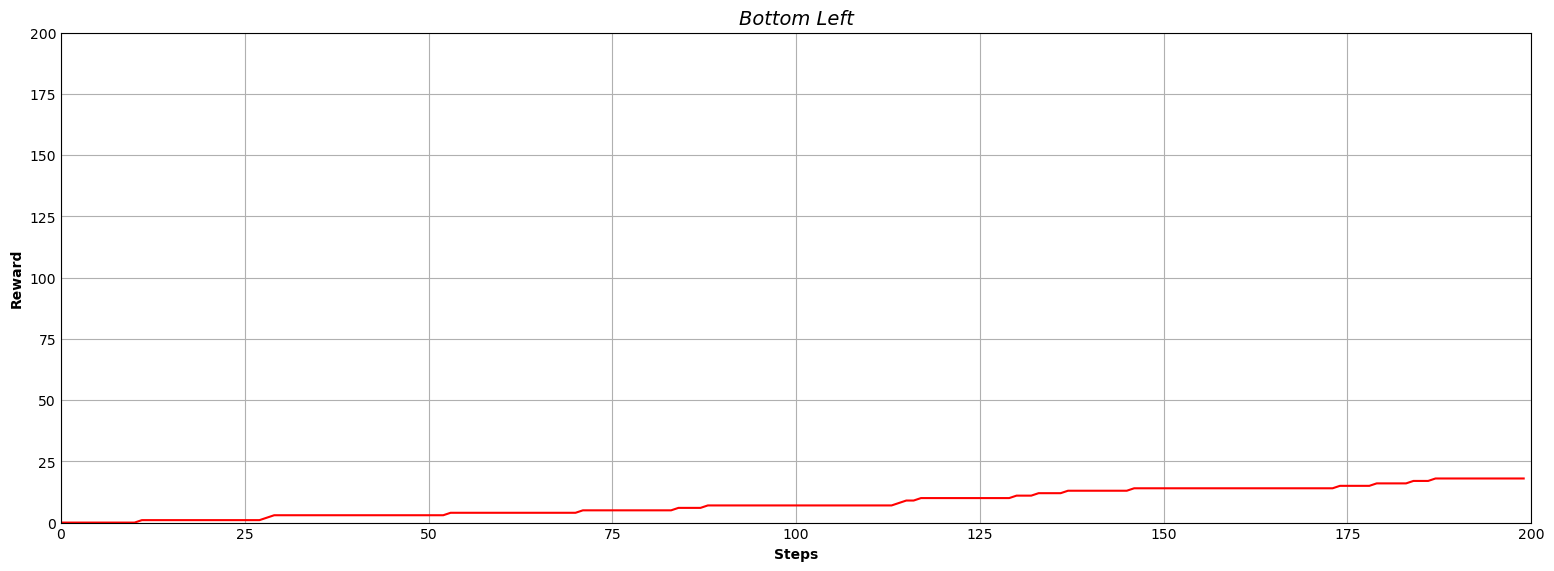

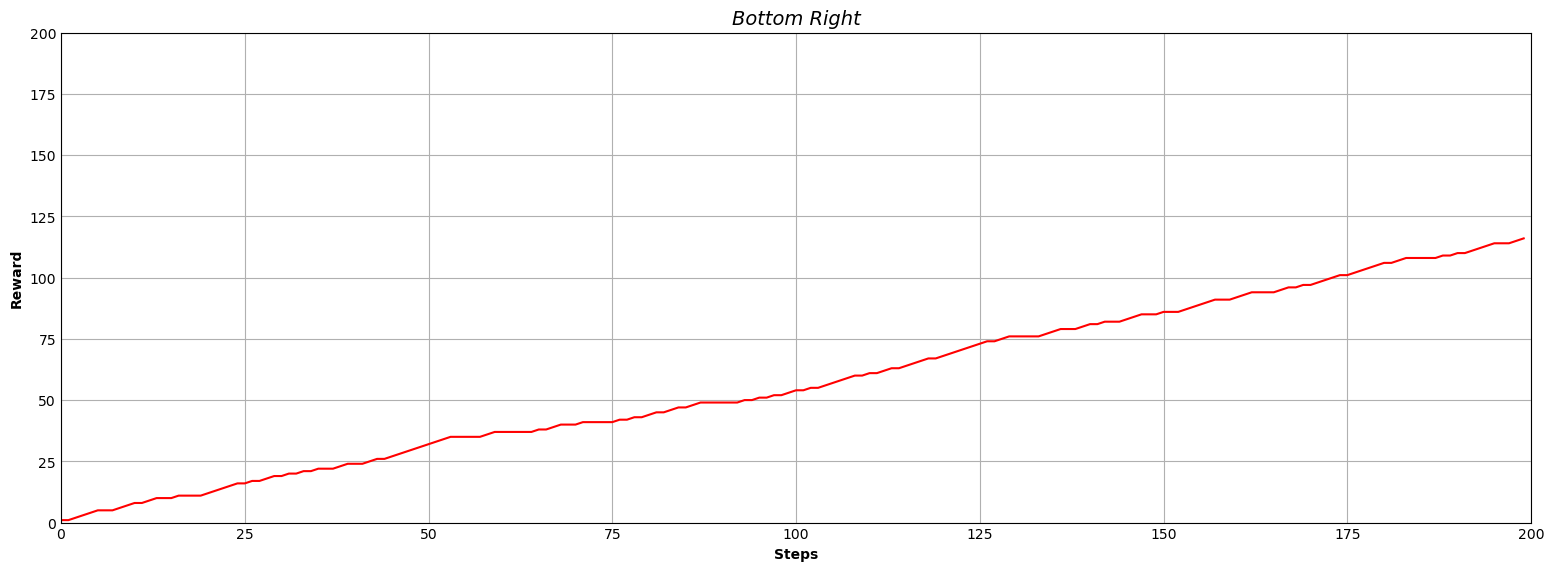

In [9]:
%reload_ext autoreload
from env.frozen_lake import FrozenLakeEnv
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt
from constants import RENDER_MODE, FPS, TOP_RIGHT, BOTTOM_LEFT, BOTTOM_RIGHT, EVAL_EPS
import os

def eval_env(
    env: DummyVecEnv,
    model: DQN,
    eps: int,
    graph_label: str,
    color: str
) -> None:
    rewards = []
    total_rewards = 0
    for i in range(eps):
        obs = env.reset()
        while True:
            action, _states = model.predict(obs)
            obs, _rewards, dones, infos = env.step(action)
            if dones[0]:
                total_rewards += _rewards[0]
                rewards.append(total_rewards)
                print(f'eval_ep: {i+1}/{eps} | current_reward: {_rewards[0]} | total_rewards: {total_rewards}', end='\r')
                obs = env.reset()
                break
    print(f'\nfinished evaluating {eps} eps. total_rewards: {total_rewards}')
    plt.figure(figsize=(15,5))
    plt.xlim(0, eps)
    plt.ylim(0, eps)
    plt.plot(rewards, linestyle="-", color=color)
    plt.title(graph_label, fontname='sans-serif', fontsize=14, fontstyle='italic')
    plt.xlabel("Episode", fontname='sans-serif', fontweight="semibold")
    plt.ylabel("Reward", fontname='sans-serif', fontweight="semibold")
    plt.savefig(f'./results/{graph_label.replace(" ", "_")}_eval_rewards.png')

os.makedirs("./results", exist_ok=True)
plt.style.use('_mpl-gallery')

top_right_env = FrozenLakeEnv(RENDER_MODE, desc=TOP_RIGHT, fps=FPS).dummy_vec_env()
top_right_model = DQN.load("./models/bottom_right.zip", env=top_right_env)
print("loaded top right model.")
bottom_right_env = FrozenLakeEnv(RENDER_MODE, desc=BOTTOM_RIGHT, fps=FPS).dummy_vec_env()
bottom_right_model = DQN.load("./models/bottom_right.zip", env=bottom_right_env)
print("loaded bottom right model.")
bottom_left_env = FrozenLakeEnv(RENDER_MODE, desc=BOTTOM_LEFT, fps=FPS).dummy_vec_env()
bottom_left_model = DQN.load("./models/bottom_right.zip", env=bottom_left_env)
print("loaded bottom right model.")

print("evaluating top right env...")
eval_env(env=top_right_env, model=top_right_model, eps=EVAL_EPS, graph_label="Top Right", color="red")

print("evaluating bottom left env...")
eval_env(env=bottom_left_env, model=bottom_left_model, eps=EVAL_EPS, graph_label="Bottom Left", color="red")

print("evaluating bottom right env...")
eval_env(env=bottom_right_env, model=bottom_right_model, eps=EVAL_EPS, graph_label="Bottom Right", color="red")


